In [23]:
import keras
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
#
# 1. Load Data
#
DATAFOLDER = '/home/d/Dropbox/CS410CatsAndDogz/'

In [25]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_train = train_generator.flow_from_directory(DATAFOLDER+'/train', 
                                              color_mode='grayscale', 
                                              target_size=(100,100))

Found 5998 images belonging to 2 classes.


In [26]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_test = test_generator.flow_from_directory(DATAFOLDER+'/test',
                                            color_mode='grayscale',
                                            target_size=(100,100))

Found 2998 images belonging to 2 classes.


In [28]:
first_image = X_train[0][0][0]
first_label = X_train[0][1][0]

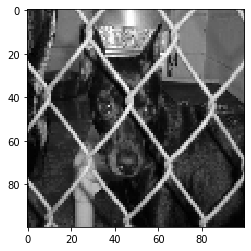

In [29]:
imshow(first_image[:,:,0], cmap='gray')

In [30]:
first_label

array([0., 1.], dtype=float32)

In [31]:
first_image.max()

0.9960785

In [32]:
first_image.shape

(100, 100, 1)

In [10]:
#
# 2. Setup Network
#

In [33]:
NUMBER_OF_CLASSES = 2

In [34]:
model = keras.applications.vgg19.VGG19(include_top=True, 
                                       weights=None,
                                       input_shape=first_image.shape,
                                       classes=NUMBER_OF_CLASSES)

In [35]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
#
# 3. Train Network
#

In [36]:
model.fit_generator(X_train, epochs=5)

Epoch 1/5
188/188 [==============================] - 51s 272ms/step - loss: 0.6938 - accuracy: 0.4847
Epoch 2/5
188/188 [==============================] - 51s 273ms/step - loss: 0.6933 - accuracy: 0.4960
Epoch 3/5
188/188 [==============================] - 54s 285ms/step - loss: 0.6932 - accuracy: 0.4960
Epoch 4/5
188/188 [==============================] - 53s 284ms/step - loss: 0.6932 - accuracy: 0.4950
Epoch 5/5
188/188 [==============================] - 54s 286ms/step - loss: 0.6932 - accuracy: 0.4857


In [16]:
#
# 4. Predict!
#

In [37]:
prediction = model.predict(X_test[0][0][12:13])

In [38]:
prediction

array([[0.5006336, 0.4993664]], dtype=float32)

In [39]:
np.argmax( prediction )

0

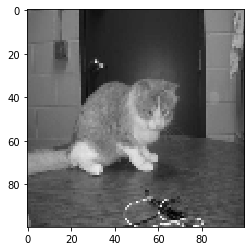

In [40]:
imshow(X_test[0][0][12,:,:,0], cmap='gray')

In [41]:
model.evaluate(X_test)

94/94 [==============================] - 11s 120ms/step


[0.6934936046600342, 0.5]

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
#
# Let's try our own image!
#
catdog = keras.preprocessing.image.load_img('/home/d/Dropbox/catdog.png', 
                                            target_size=(100,100),
                                            color_mode = "grayscale")

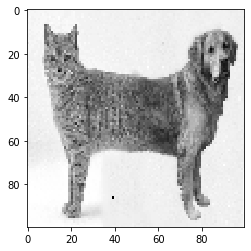

In [46]:
imshow(catdog, cmap='gray')

In [48]:
# convert to numpy array
catdog = np.array(catdog)
catdog = catdog.reshape(1,catdog.shape[0],catdog.shape[1],1)

In [49]:
# predict it!
prediction = model.predict(catdog)

In [50]:
prediction

array([[0.538332  , 0.46166795]], dtype=float32)